In [61]:
import qiskit
import numpy as np
import matplotlib.pyplot as plt
import qtm.base, qtm.constant, qtm.nqubit, qtm.onequbit
import importlib
importlib.reload(qtm.base)
importlib.reload(qtm.constant)
importlib.reload(qtm.nqubit)
importlib.reload(qtm.onequbit)
importlib.reload(qtm.qfim)


<module 'qtm.qfim' from 'c:\\Users\\haime\\OneDrive\\Máy tính\\QuantumTomographyProject\\qtm\\qfim.py'>

In [62]:

# Init parameters
num_qubits = 3
theta = np.random.uniform(0, 2*np.pi)
thetas = np.ones((2*num_qubits*3))
# Init quantum tomography n qubit
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc = qtm.nqubit.create_ghz_state(qc, theta)
# Reduce loss value in 100 steps
thetas, loss_values_qng = qtm.base.fit(
    qc, num_steps = 100, thetas = thetas, 
    create_circuit_func = qtm.nqubit.u_cluster_nqubit, 
    grad_func = qtm.base.grad_loss,
    loss_func = qtm.base.loss_basis,
    optimizer = qtm.base.qng,
    verbose = 1
)



































Step:  15%|█▌        | 15/100 [12:44<1:12:13, 50.98s/it]





































































Step: 100%|██████████| 100/100 [02:11<00:00,  1.31s/it]


In [63]:
np.min(loss_values_qng)

0.0257568359375

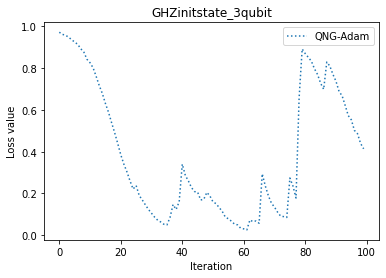

In [64]:
# Plot loss value in 100 steps

plt.plot(loss_values_qng, label='QNG-Adam', linestyle = ':')
plt.title('GHZinitstate_3qubit')
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Loss value")
plt.show() 

In [ ]:
# Theta, phi, lambdaz is the params of u3 gate
theta = np.random.uniform(0, np.pi)
phi = np.random.uniform(0, 2*np.pi)
lambdaz = 0
# Init quantum tomography 1 qubit
thetas = np.zeros((3,))
loss_values = []
qc = qiskit.QuantumCircuit(1, 1)
qc.u3(theta, phi, lambdaz, 0)
# Reduce loss value in 100 steps
thetas, loss_values_qng = qtm.base.fit(
    qc, num_steps = 100, thetas = thetas, 
    create_circuit_func = qtm.onequbit.u_onequbit, 
    grad_func = qtm.base.grad_loss,
    loss_func = qtm.base.loss_basis,
    optimizer = qtm.base.qng,
    verbose = 1,
    wire = 0
)


In [56]:
thetas = np.zeros((3,))
loss_values = []
qc = qiskit.QuantumCircuit(1, 1)
qc.u3(theta, phi, lambdaz, 0)
# Reduce loss value in 100 steps
thetas, loss_values_adam = qtm.base.fit(
    qc, num_steps = 100, thetas = thetas, 
    create_circuit_func = qtm.onequbit.u_onequbit, 
    grad_func = qtm.base.grad_loss,
    loss_func = qtm.base.loss_basis,
    optimizer = qtm.base.adam,
    verbose = 1,
    wire = 0
)






































































































Step: 100%|██████████| 100/100 [00:19<00:00,  5.05it/s]


In [59]:
thetas = np.zeros((3,))
loss_values = []
qc = qiskit.QuantumCircuit(1, 1)
qc.u3(theta, phi, lambdaz, 0)
# Reduce loss value in 100 steps
thetas, loss_values_sgd = qtm.base.fit(
    qc, num_steps = 100, thetas = thetas, 
    create_circuit_func = qtm.onequbit.u_onequbit, 
    grad_func = qtm.base.grad_loss,
    loss_func = qtm.base.loss_basis,
    optimizer = qtm.base.sgd,
    verbose = 1,
    wire = 0
)






































































































Step: 100%|██████████| 100/100 [00:19<00:00,  5.26it/s]


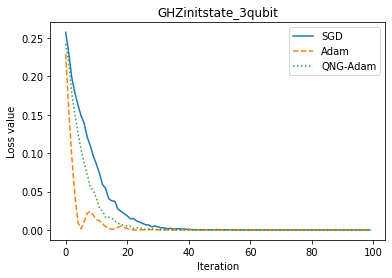

In [60]:
# Plot loss value in 100 steps
plt.plot(loss_values_sgd, label='SGD', linestyle = '-')
plt.plot(loss_values_adam, label='Adam', linestyle = '--')
plt.plot(loss_values_qng, label='QNG-Adam', linestyle = ':')
plt.title('GHZinitstate_3qubit')
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Loss value")
plt.show() 